In [1]:
# packages for both analysis and plotting
import numpy as np
import pandas as pd
from tqdm import tqdm
import re

# packages for only plotting
import colorcet
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.patches as mpatches
from matplotlib.offsetbox import DrawingArea, AnnotationBbox
import matplotlib.font_manager as font_manager
from matplotlib.collections import PathCollection
from statsmodels.stats.multitest import multipletests
pyplot.rcParams['svg.fonttype'] = 'none'
mpl.rcParams.update({'font.size': 8})
mpl.rcParams['figure.dpi'] = 300

In [2]:
# A, B, M

proportions = np.array([[0.41, 0.4, 0.16], # mouse, Masland 2011
                        [45, 56, 12], # rat, Gomes 2011
                        [23, 39, 13], # chick E18, Yamagata 2021
                        [0.28, 0.40, 0.22], # monkey, Martin and Grunert 1992
                      ])
proportions

array([[ 0.41,  0.4 ,  0.16],
       [45.  , 56.  , 12.  ],
       [23.  , 39.  , 13.  ],
       [ 0.28,  0.4 ,  0.22]])

In [3]:
proportions_norm = np.array([i/i.sum() for i in proportions])
proportions_norm

array([[0.42268041, 0.41237113, 0.16494845],
       [0.39823009, 0.49557522, 0.10619469],
       [0.30666667, 0.52      , 0.17333333],
       [0.31111111, 0.44444444, 0.24444444]])

In [4]:
np.around(proportions_norm*30, 0)

array([[13., 12.,  5.],
       [12., 15.,  3.],
       [ 9., 16.,  5.],
       [ 9., 13.,  7.]])

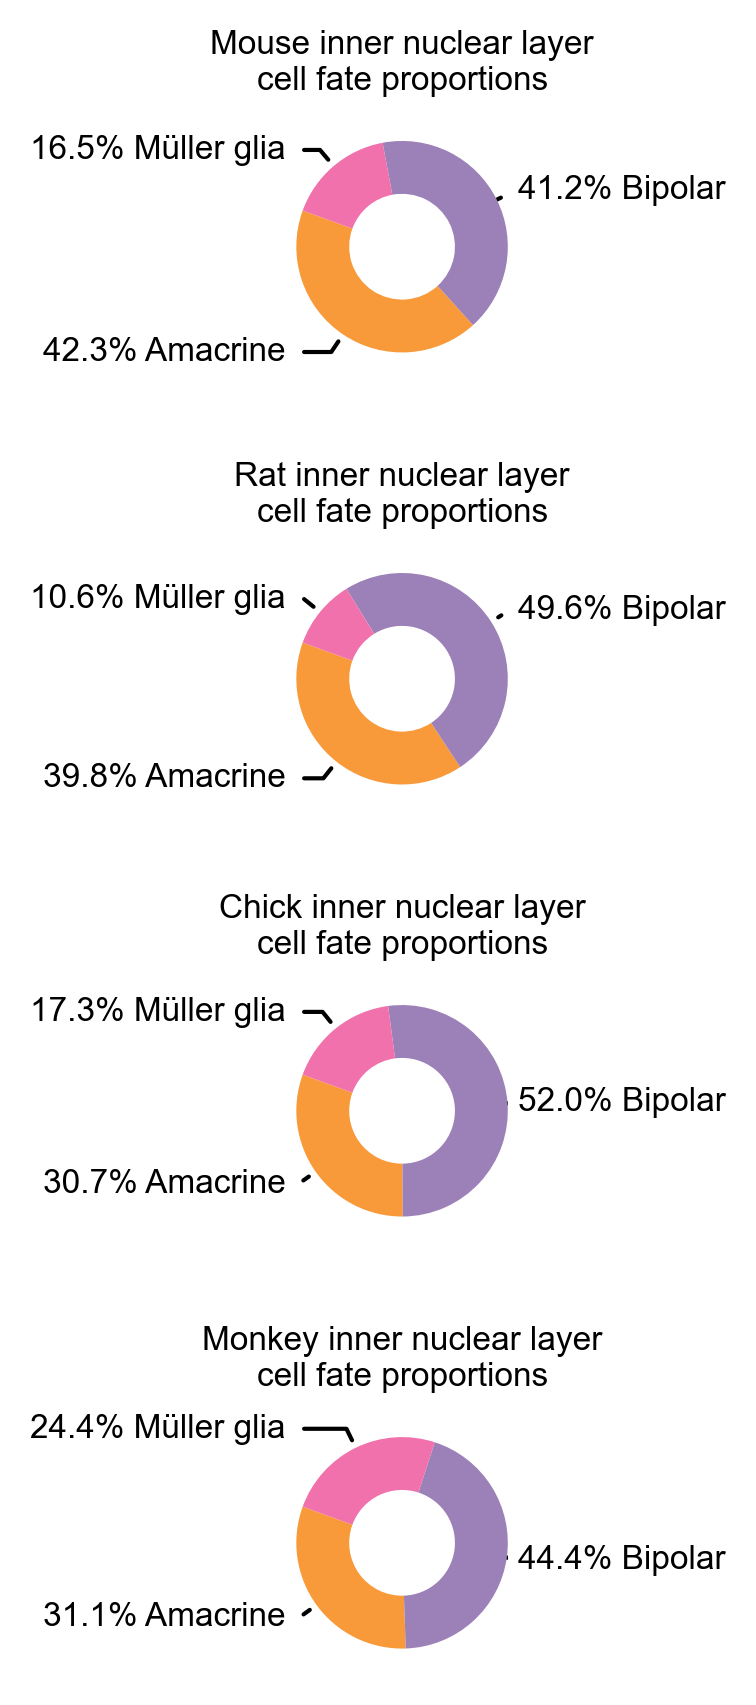

In [10]:
dataset_names = ['Mouse', 'Rat', 'Chick', 'Monkey']
cell_types = ['Amacrine', 'Bipolar', 'Müller glia']

fig, axn = pyplot.subplots(4, 1, figsize=(2, 6))

for i, ax in enumerate(axn.flat):
    
    data = proportions_norm[i]
    
    colors_to_use = ['#F89A3A', '#9C80B8', '#F071AB',]
    wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-200, colors=colors_to_use, )

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for b, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(f'{round(data[b]*100, 1)}% {cell_types[b]}', xy=(x, y), xytext=(1.1*np.sign(x), 1.2*y),horizontalalignment=horizontalalignment, **kw, **{'fontname':'Arial', 'size':8})
        
    ax.set_title(f"{dataset_names[i]} inner nuclear layer\ncell fate proportions", y=1, **{'fontname':'Arial', 'size':8})
    
pyplot.tight_layout(h_pad=0)

pyplot.savefig(f"species_cell_fate_proportions.svg", dpi=300, bbox_inches="tight")